In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv(r"C:\Users\PRASAD\OneDrive\Documents\PNQ_AQI.csv")
data.head()

In [3]:
data.isnull().sum()


Date             0
SO2 µg/m3        0
Nox µg/m3        0
RSPM µg/m3       1
SPM           4874
CO2 µg/m3     7844
AQI             57
Location         0
dtype: int64

In [4]:
# Convert the 'Date' column with dayfirst=True and allow errors to be coerced
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

# Optionally, drop rows where the date conversion failed
data = data.dropna(subset=['Date'])

# Format the date column to string in "YYYY-MM-DD" format
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

print(data['Date'].head())
print(data['Date'].dtype)

0    2009-01-01
1    2009-01-02
2    2009-01-03
3    2009-01-04
4    2009-01-07
Name: Date, dtype: object
object


In [5]:
data.drop(columns=['CO2 µg/m3'], inplace=True)
data.drop(columns=['SPM'], inplace=True)


In [6]:
data.sample(5)

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,AQI,Location
1499,2011-01-06,28,92,175.0,150.0,MPCB-SWGT
57,2009-03-07,21,27,184.0,156.0,MPCB-KR
7616,2018-08-03,32,54,15.0,68.0,MPCB-PMPR
4925,2015-08-12,25,51,97.0,97.0,Karve Road
5369,2016-12-04,11,64,106.0,104.0,Karve Road


In [7]:
# Step 1: Replace 'BDL - NA' with NaN
data['SO2 µg/m3'] = data['SO2 µg/m3'].replace('BDL - NA', np.nan)
data['Nox µg/m3'] = data['Nox µg/m3'].replace('BDL - NA', np.nan)

# Step 2: Convert columns to numeric
data['SO2 µg/m3'] = pd.to_numeric(data['SO2 µg/m3'], errors='coerce')
data['Nox µg/m3'] = pd.to_numeric(data['Nox µg/m3'], errors='coerce')

# Step 3: Impute missing values with mean (without inplace=True)
data['SO2 µg/m3'] = data['SO2 µg/m3'].fillna(data['SO2 µg/m3'].mean())
data['Nox µg/m3'] = data['Nox µg/m3'].fillna(data['Nox µg/m3'].mean())

# Check the result
print("\nSO2 µg/m3 and Nox µg/m3 After Imputation:")
print(data[['SO2 µg/m3', 'Nox µg/m3']].head())



SO2 µg/m3 and Nox µg/m3 After Imputation:
   SO2 µg/m3  Nox µg/m3
0       15.0       53.0
1       15.0       48.0
2       13.0       51.0
3        8.0       37.0
4       13.0       36.0


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# Apply Label Encoding to the 'Location' column
data['Location'] = le.fit_transform(data['Location'])

# Display the first few rows to verify
print("\nLocation Encoding:")
print(data[['Location']].head())



Location Encoding:
   Location
0         3
1         3
2         3
3         3
4         3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1927 entries, 0 to 7843
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1927 non-null   object 
 1   SO2 µg/m3   1927 non-null   float64
 2   Nox µg/m3   1927 non-null   float64
 3   RSPM µg/m3  1927 non-null   float64
 4   AQI         1923 non-null   float64
 5   Location    1927 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 105.4+ KB


In [10]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract Year, Month, Day, and Day of Week
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original Date column as it's no longer needed
data.drop(columns=['Date'], inplace=True)

# Display the first few rows to verify
print("\nDate Feature Extraction:")
print(data.head())



Date Feature Extraction:
   SO2 µg/m3  Nox µg/m3  RSPM µg/m3    AQI  Location  Year  Month  Day  \
0       15.0       53.0       179.0  153.0         3  2009      1    1   
1       15.0       48.0       156.0  137.0         3  2009      1    2   
2       13.0       51.0       164.0  143.0         3  2009      1    3   
3        8.0       37.0       135.0  123.0         3  2009      1    4   
4       13.0       36.0       140.0  127.0         3  2009      1    7   

   DayOfWeek  
0          3  
1          4  
2          5  
3          6  
4          2  


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1927 entries, 0 to 7843
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SO2 µg/m3   1927 non-null   float64
 1   Nox µg/m3   1927 non-null   float64
 2   RSPM µg/m3  1927 non-null   float64
 3   AQI         1923 non-null   float64
 4   Location    1927 non-null   int64  
 5   Year        1927 non-null   int32  
 6   Month       1927 non-null   int32  
 7   Day         1927 non-null   int32  
 8   DayOfWeek   1927 non-null   int32  
dtypes: float64(4), int32(4), int64(1)
memory usage: 120.4 KB


Dataset shape after outlier removal: (1750, 9)


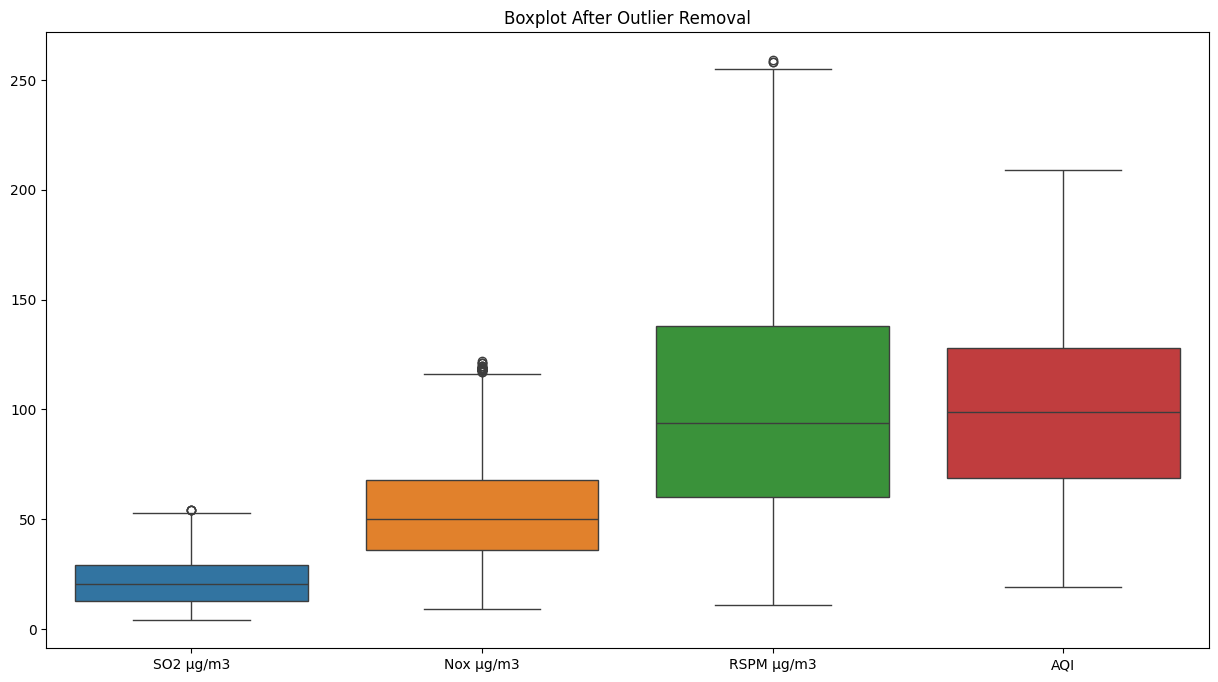

In [12]:
# List of numerical columns to check for outliers
numerical_cols = ['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'AQI']

# Remove outliers using IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Display the shape of the dataset after outlier removal
print(f"Dataset shape after outlier removal: {data.shape}")

# Verify by plotting boxplots again (Optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numerical_cols])
plt.title('Boxplot After Outlier Removal')
plt.show()


Dataset shape after adjusted outlier removal for Nox µg/m3: (1750, 9)


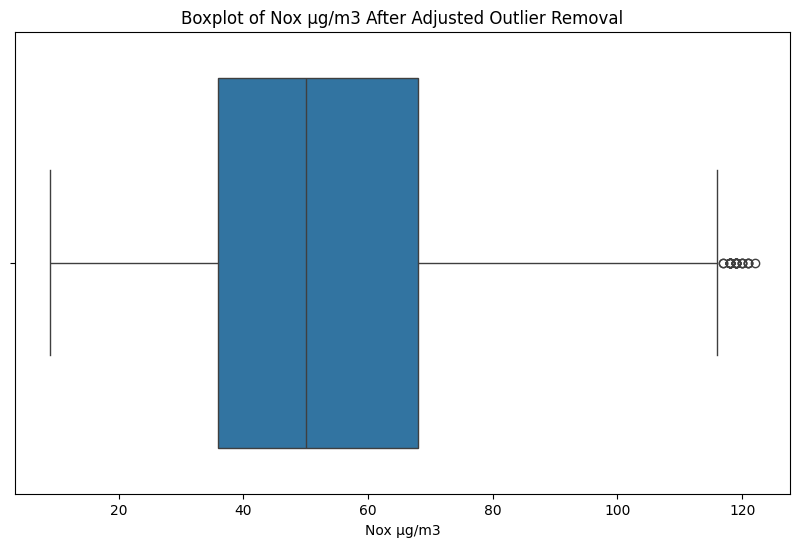

In [13]:
# Adjusted IQR method with a multiplier of 2.5
col = 'Nox µg/m3'
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR
data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Display the shape of the dataset after outlier removal
print(f"Dataset shape after adjusted outlier removal for {col}: {data.shape}")

# Plot the boxplot again to check the effect
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[col])
plt.title(f'Boxplot of {col} After Adjusted Outlier Removal')
plt.show()


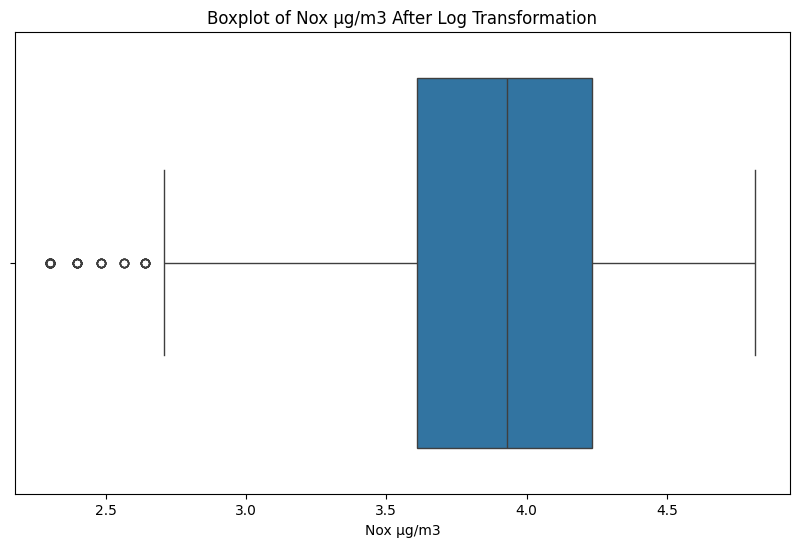

In [14]:
# Apply Log Transformation
import numpy as np

data['Nox µg/m3'] = np.log1p(data['Nox µg/m3'])  # log1p handles log(0) by adding 1

# Re-plot the boxplot to check the effect
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Nox µg/m3'])
plt.title('Boxplot of Nox µg/m3 After Log Transformation')
plt.show()


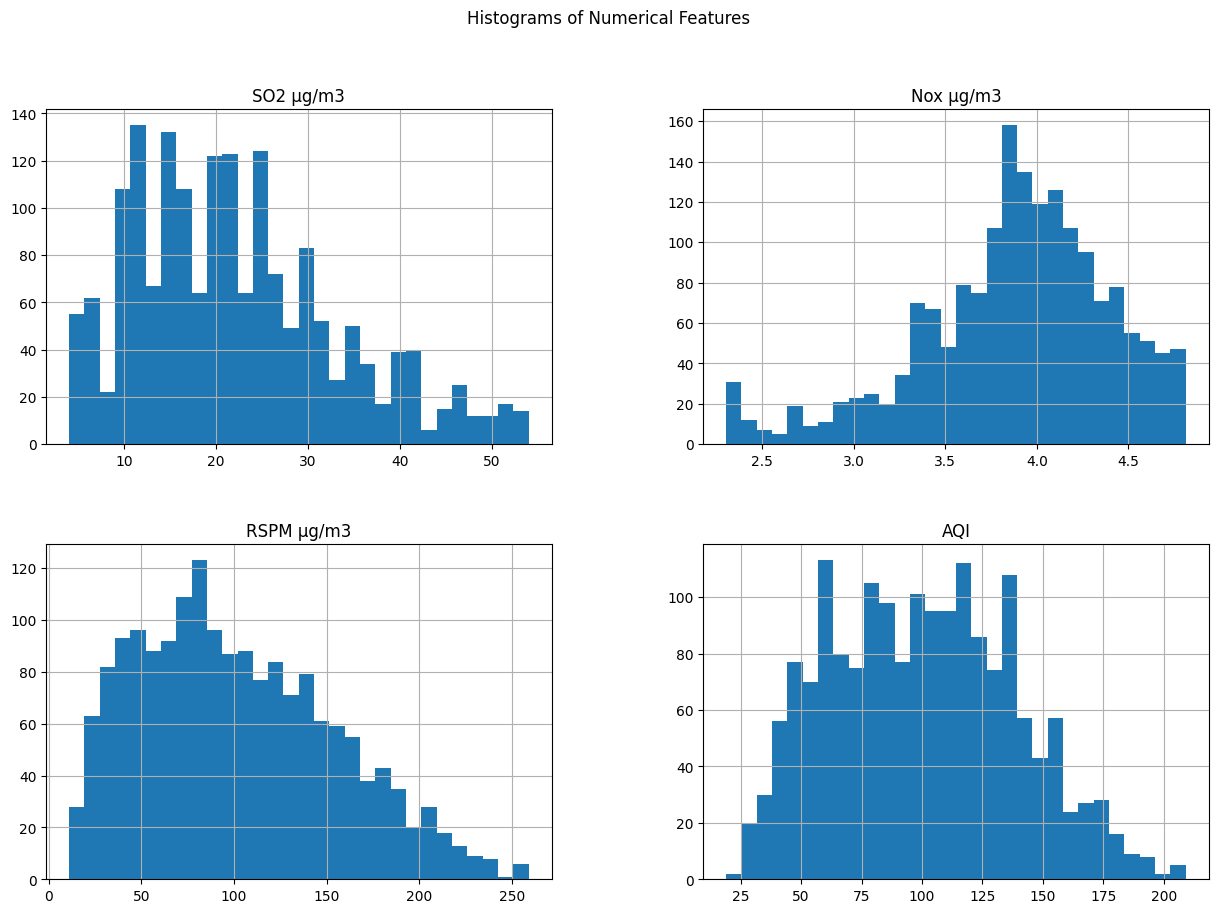

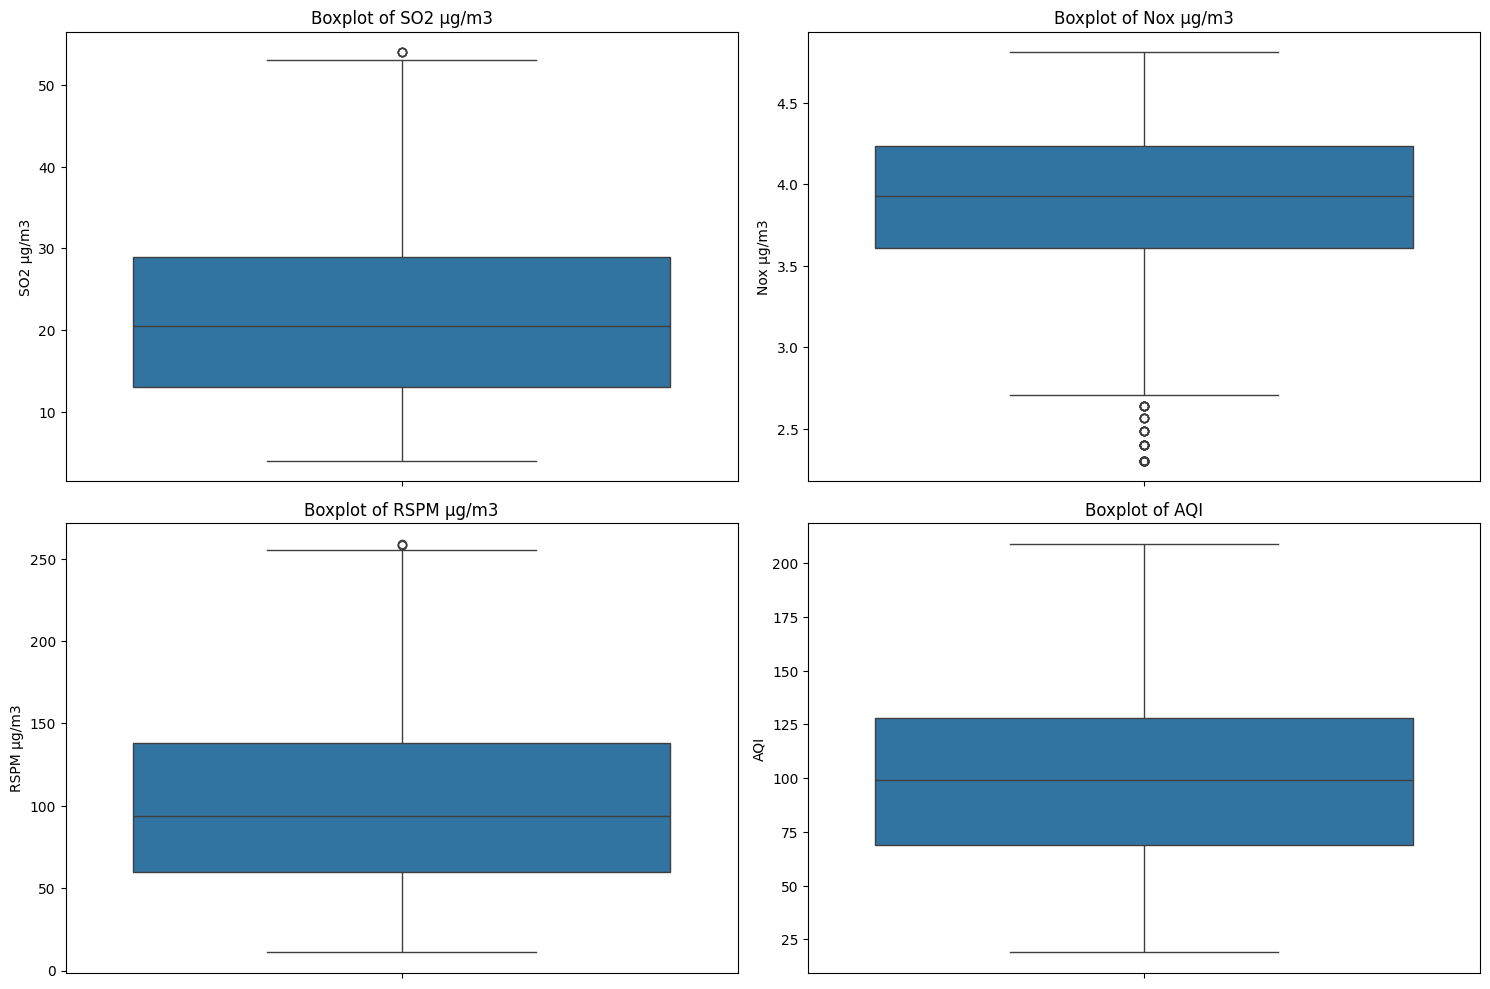

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'AQI']

# Plot histograms
data[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Plot boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [27]:
# Drop rows where AQI is missing
# Create a cleaned version
data_cleaned = data.dropna(subset=['AQI'])

# Confirm no more missing values in AQI
print(data_cleaned['AQI'].isna().sum())

# Check the shape after dropping the rows
print("Shape after dropping missing AQI:", data_cleaned.shape)


0
Shape after dropping missing AQI: (1750, 9)


In [28]:
# Drop rows with missing AQI values
data = data.dropna(subset=['AQI'])

# Verify if any missing values are left
print(data.isnull().sum())


SO2 µg/m3     0
Nox µg/m3     0
RSPM µg/m3    0
AQI           0
Location      0
Year          0
Month         0
Day           0
DayOfWeek     0
dtype: int64


In [29]:
data.isnull().sum()

SO2 µg/m3     0
Nox µg/m3     0
RSPM µg/m3    0
AQI           0
Location      0
Year          0
Month         0
Day           0
DayOfWeek     0
dtype: int64

In [30]:
# Descriptive Statistics
data.describe().T


,count,mean,std,min,25%,50%,75%,max
SO2 µg/m3,1750.0,22.073519,11.182798,4.000000,13.000000,20.500000,29.000000,54.000000
Nox µg/m3,1750.0,3.875608,0.527471,2.302585,3.610918,3.931826,4.234107,4.812184
RSPM µg/m3,1750.0,101.628000,52.910817,11.000000,60.000000,94.000000,138.000000,259.000000
AQI,1750.0,99.988000,38.297015,19.000000,69.000000,99.000000,128.000000,209.000000
Location,1750.0,3.795429,2.384767,0.000000,2.000000,3.000000,5.750000,9.000000
Year,1750.0,2014.017143,3.513552,2009.000000,2010.000000,2015.000000,2017.000000,2019.000000
Month,1750.0,6.086286,3.457822,1.000000,3.000000,6.000000,9.000000,12.000000
Day,1750.0,6.507429,3.457940,1.000000,4.000000,7.000000,10.000000,12.000000
DayOfWeek,1750.0,2.776571,1.919721,0.000000,1.000000,3.000000,4.000000,6.000000


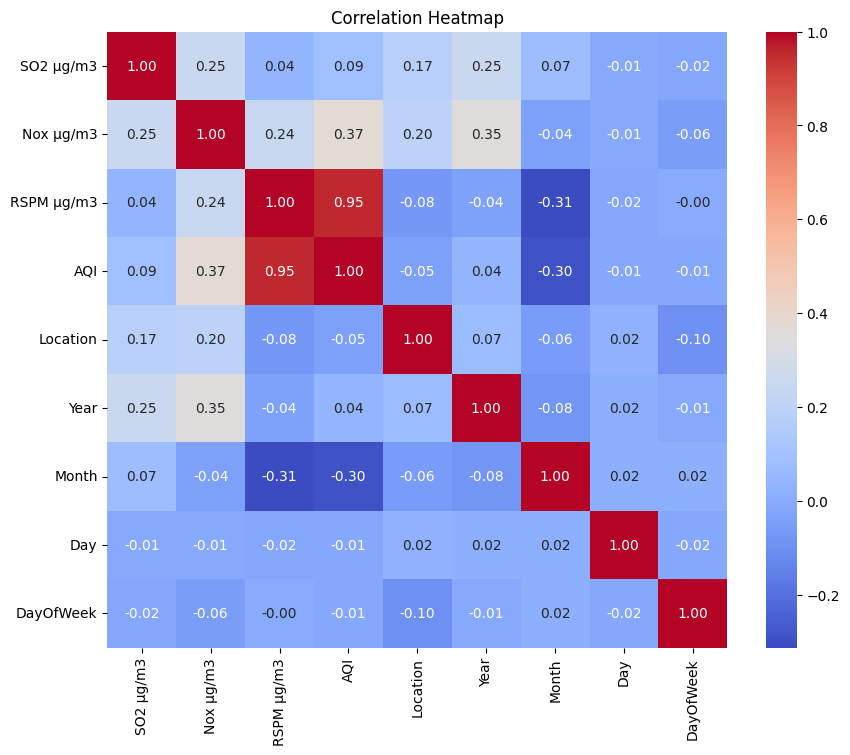

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


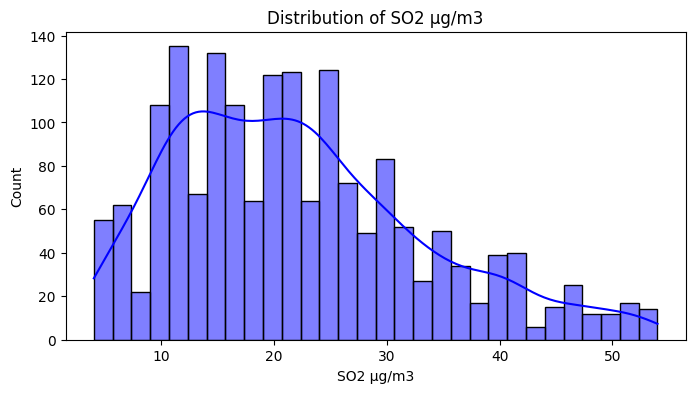

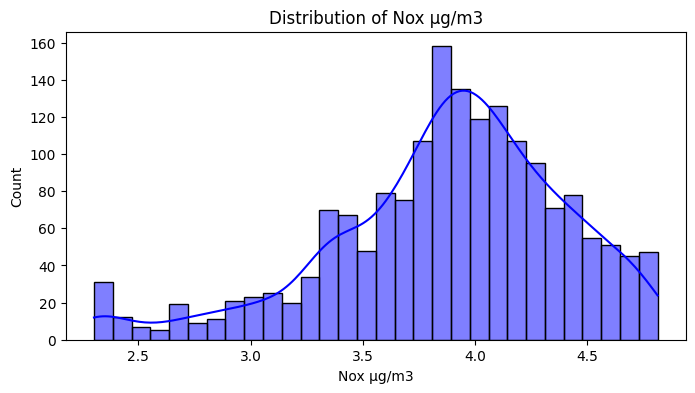

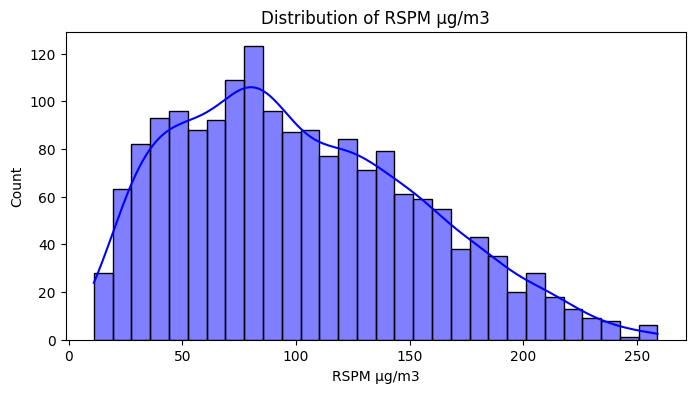

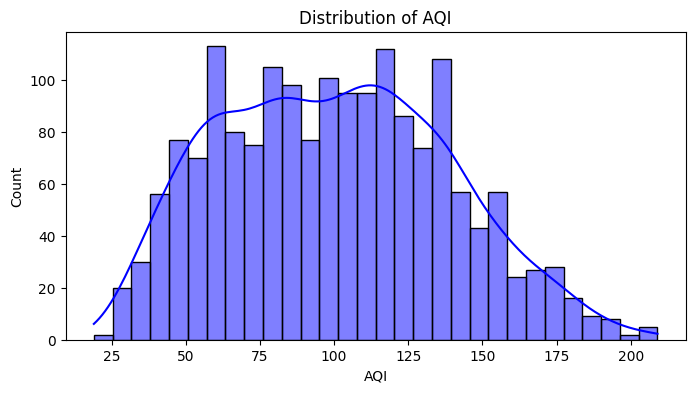

In [32]:
# Histograms and KDE plots for all pollutants and AQI
features = ['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'AQI']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()


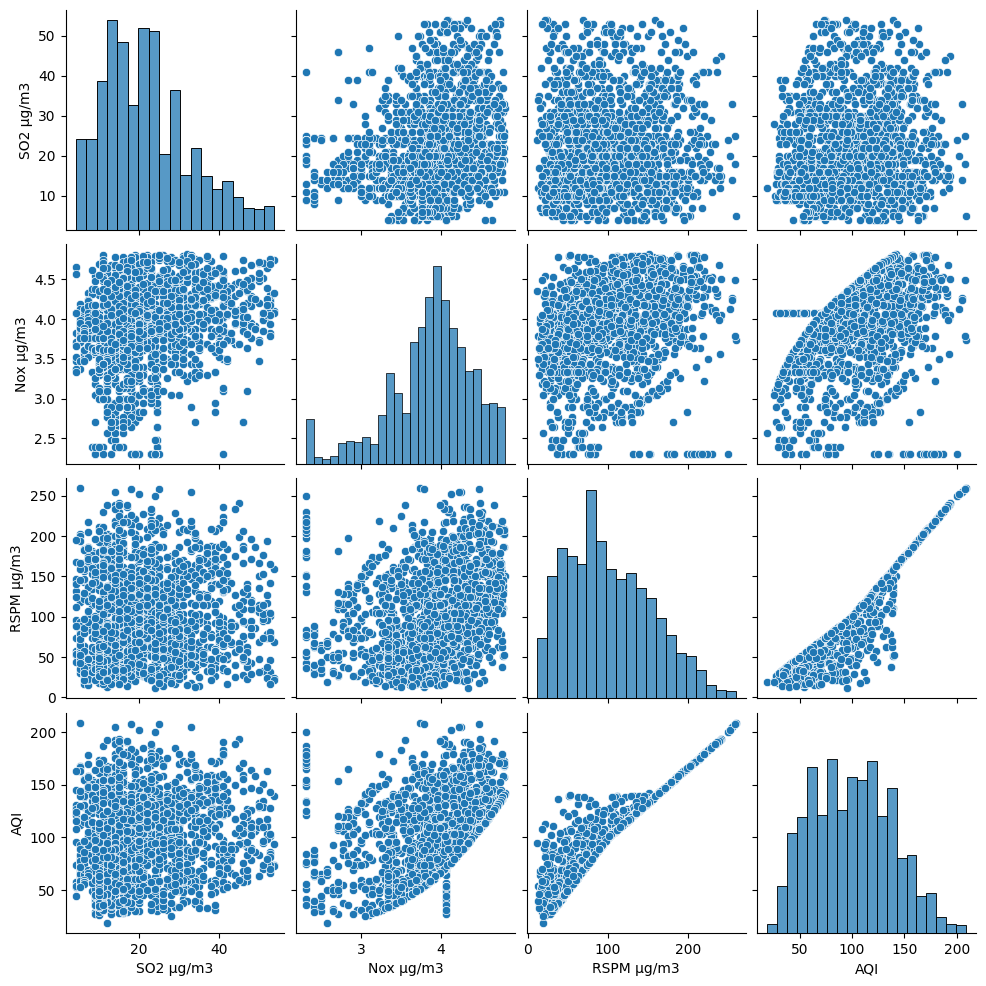

In [33]:
# Pairplot to observe relationships between features
sns.pairplot(data[features])
plt.show()


In [35]:
#We are scaling all numeric columns except the target variable (AQI).

from sklearn.preprocessing import StandardScaler

# Select the columns to scale
numeric_features = ['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'Year', 'Month', 'Day', 'DayOfWeek']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
data_cleaned[numeric_features] = scaler.fit_transform(data_cleaned[numeric_features])

# Display the first few rows to verify the scaling
print(data_cleaned.head())


   SO2 µg/m3  Nox µg/m3  RSPM µg/m3    AQI  Location      Year     Month  \
0  -0.632717   0.215004    1.462728  153.0         3 -1.428349 -1.471371   
1  -0.632717   0.030744    1.027910  137.0         3 -1.428349 -1.471371   
2  -0.811614   0.143433    1.179151  143.0         3 -1.428349 -1.471371   
3  -1.258857  -0.451381    0.630902  123.0         3 -1.428349 -1.471371   
4  -0.811614  -0.501954    0.725428  127.0         3 -1.428349 -1.471371   

        Day  DayOfWeek  
0 -1.593146   0.116419  
1 -1.303874   0.637477  
2 -1.014602   1.158535  
3 -0.725329   1.679593  
4  0.142487  -0.404639  


In [38]:
# Features and Target Variable
X = data.drop(columns='AQI')
y = data['AQI']
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Random Forest Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R² Score: {r2_rf}")



Random Forest Results:
MAE: 0.4159428571428571
MSE: 1.5688839999999997
R² Score: 0.9989248075221066


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))   #cross valid is smaller than R**2 means overfitting


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated R² Score:", grid_search.best_score_)


In [ ]:
data.isnull()